# An Introduction to Python for Scientific Computing

In this chapter we'll cover the basics of Python, including how to import libraries, unique features of Python for scientific computing, and some key datatypes we will use throughout the course.

[Click here to open this notebook in Colab](https://colab.research.google.com/github/williamgilpin/cphy/blob/main/talks/python_intro.ipynb)

<!-- Preamble: Run the cells below to import the necessary Python packages

*This notebook was created by William Gilpin. Consult the [course website](https://www.wgilpin.com/cphy) for all content and [GitHub repository](https://github.com/williamgilpin/cphy) for raw files and runnable online code.* -->

## Imports and preamble

Imports are external Python libraries, usually stored in `.py` files on the filesystem. These include external modules that implement common functionality, like plotting, numerical computing, and data analysis. Modules can also be written by the user themselves, and stored in the same directory as the notebook, or in a subdirectory.

If we want to use a module in our notebook, we can import it using the `import` statement. Since our notebook environment runs on Python, we don't need to import the language itself. However, for compatibility reasons, it's often worth checking that you are using the right version of Python (usually Python 3). You can do this by importing the `sys` module, which includes a bunch of tools for inspecting and manipulating various elements of your system.

In [78]:
# pre-installed library containing a grab bag of system functions
import sys

print(sys.version)

3.13.1 | packaged by conda-forge | (main, Jan 13 2025, 09:45:31) [Clang 18.1.8 ]




**Encapsulation.** At the preamble stage, it's usually a good time to check that you are using the right environment before you start using or writing code.

While not covered here, when working with multiple Python projects it is usually best practice to use some degree of encapsulation. This can include virtual environents like `uv`, `mamba`, `conda`, `pyenv` or `virtualenv`, all of which isolate dependencies among different Python libraries to ensure intercompatibility. To isolate at the level of the entire system, containers like Docker. For certain workflows, particularly those arising in bioinformatics, it makes sense to isolate the entire computing environment, essentially by simulating an isolated computer like a virtual machine. Cloud-hosted environments like Google Colab or CodeOcean provide virtual machines that do this.


# About Jupyter and Jupyter Notebooks

We will be using Jupyter Notebooks as the development environment for this book. Unlike raw python scripts `.py`, Jupyter Notebooks allow us to mix code, text, and visualizations in a single document, similar to a Mathematica notebook. A few key things to know about Jupyter Notebooks:

1. **Kernel.** The Jupyter Notebook is a client-server application. The server is the "kernel", which is responsible for executing the code. The client is the notebook interface, which allows you to write code, text, and visualizations in a single document.

2. **Order of execution.** Code in Jupyter Notebooks is executed cell by cell. This means that you can run a cell multiple times without having to re-run the entire notebook. Once a cell is run, the output is displayed inline with the code. Any variables defined in a cell are available for the duration of the session unless otherwise specified. Unlike raw python scripts, the order of execution is important, but not the order in which cells appear in the notebook. Once the notebook is retarted, all variables are reset, and only the text within cells (the code itself that sets variables) remains.

2. **Magic commands.** Magic commands are special commands that start with a `%` that modify the behavior of the notebook. For example, `%matplotlib inline` tells the notebook to display matplotlib plots inline. These are *not* standard Python commands and they will cause errors if used in a `.py` file.



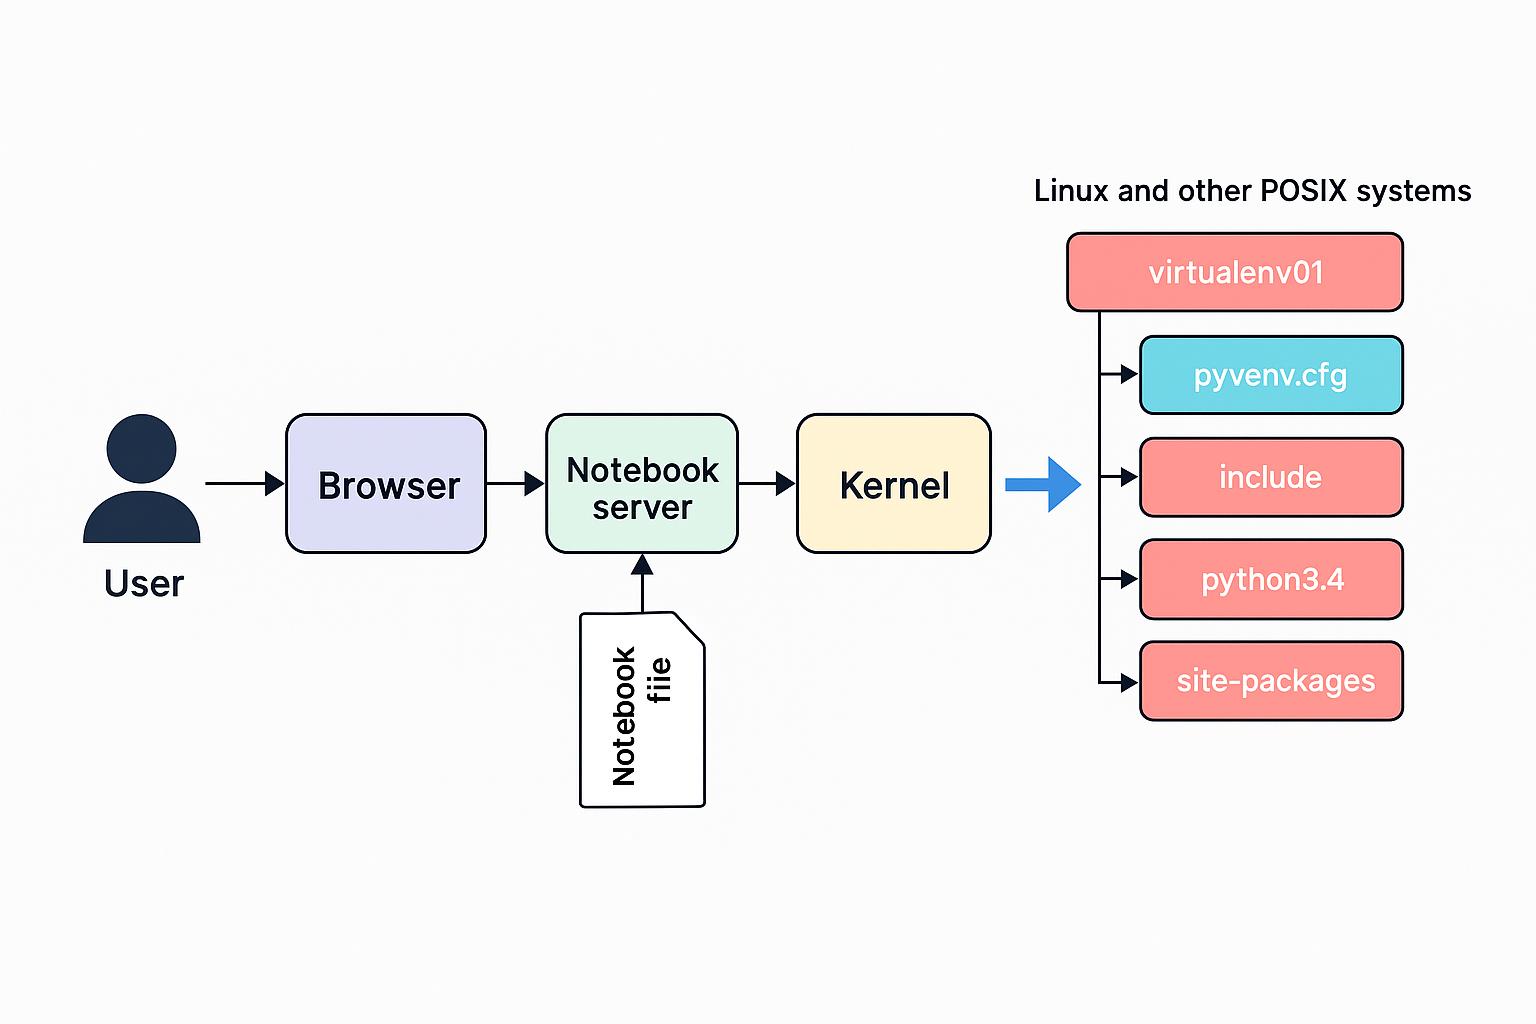

In [1]:
from IPython.display import Image
Image("../resources/jupyterkernels.png")

We will use a few Jupyter magic commands, which set certain features of our notebook environment. Below, I import a standard Python object, `Image`, from the `IPython.display` module. This object is treated specially by Jupyter, and it allows us to display images inline with the notebook.

I also import the Python plotting library `matplotlib`, and set the `%matplotlib inline` magic command, which tells the notebook to display matplotlib plots inline in the notebook, rather than opening a new window.

Finally, I load a Jupyter extension, `autoreload`, which tells the notebook to reload imported modules whenever the notebook is run. This is useful if you are developing code in a separate file and then importing it to the notebook, and you want to test the effects of your changes without restarting the notebook and kernel.

In [15]:
# Import some local code, which I'll use behind the scenes
# from ../resources import helper_functions

# Wipe all outputs from this notebook
from IPython.display import Image, clear_output
clear_output(True)

# Import local plotting functions and in-notebook display functions
import matplotlib.pyplot as plt

# Import autoreload extension and set it to reload all modules whenever code is run
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Why Python?


Python has become one of the most popular and flexible languages for scientific computing because it is an **interpreted language**, which makes experimentation and prototyping fast and interactive. It is also highly extensible, with a vast ecosystem of external modules that can be imported for numerical analysis, symbolic mathematics, data visualization, parallel computing, and machine learning. This flexibility allows developers to move quickly from ideas to implementation without getting bogged down in low-level details or implementing their own versions of common tools.

Other strong options for computational physics include C and C++, which remain unmatched for performance-critical applications where fine-grained control over memory and hardware is essential, and Mathematica, which is particularly powerful for symbolic manipulation, algebraic computation.

While we are using Python, it is worth keeping an eye on newer and evolving languages for scientific computing such as Julia, which aims to combine the ease of Python with the speed of C. As a newer language than Python, Julia aims to combine the accessibility of a high-level dynamic language like Python while achieving performance closer to C, thanks to just-in-time (JIT) compilation. Julia also offers native linear algebra and parallelism. Rust a new compiled language aiming to replace C and potentially Fortran in many settings. It provides low-level performance comparable to C and C++, but with a strong focus on memory safety and concurrency guarantees enforced at compile time. Its ownership and borrowing system eliminates entire classes of bugs (like data races and segmentation faults), making it especially appealing for high-performance computing where reliability is critical.

Several specialized languages and environments are tailored to particular domains of scientific computing: R is widely used in statistics; MATLAB remains a standard in engineering and applied mathematics, especially for signal processing and control system design; and Perl, though less common today, still sees use in text processing and legacy bioinformatics pipelines.

# Python basic syntax

Python shares many features in common with object-oriented languages like Java or C++, and the scientific computing libraries have similar syntax to MATLAB, a popular domain-specific language used in some branches of engineering. Here, rather than reviewing all of Python's structure, we will focuse on the "sharp edges" that might surprise users coming from other languages, as well as other unique quirks of the Python language.

**Assigning variables**

Usually in Python we use native float and integer types.

## Assigning variables, pass by value for immutable types

In [81]:
a = 1
b = 2
# print(a, b)

# temp = a
# a = b
# b = temp
# print(a, b)

a, b = b, a
print(a, b)

2 1


# Python data types

Everything in Python is an object: variables, functions, digits. Objects in Python have a unified syntax for inspecting their properties:

+ Calling `type(obj)` on an object `obj` will identify the general class of an object. For example, calling `type(1)` returns `int`, because the number 1 is a specific instance of the integer class.

+ Calling `dir(obj)` returns a list of *methods* associated with that object. Methods are functions that implement various ways you might want to modify or combine objects. We will use and implement many objects throughout the course, but for the case of an `int` object, an example of a method would be `__add__`

+ Callimng `help(obj)` returns a high-level description of the object, as well as its most commonly-used methods and properties.

In [86]:
# Find the type of an integer
# a = 1
# print(type(a))

# # # Find the type of a string
# b = "Kolmogorov"
# print(type(b))

# # List the first ten methods associated with a variable
a = 1
help(a)
# print(len(dir(a)))

74


# Built-in data types

Given information: detector counts, velocities, temperatures, how do we store it and access it? We need to define primitive data types for data analysis or for storing within a simulation. The commonbuilt-in, or native, data types in Python are:

+ `int` represent whole numbers, like 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, etc.
+ `float` represent real numbers with a decimal point and limited precision, like 1.0, 2.7, 3.14, 5.3329232, etc.
+ `str` represent text, like "Hello, world!", "This is a string", "12345", etc. In Python, there is no separate "character" type, characters like the letter "p" are represented as strings of length 1.
+ `list` represent ordered collections of objects, like `[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]`, `["apple", "banana", "cherry"]`, etc.
+ `tuple` represent ordered, immutable collections of objects, like `(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)`, `("apple", "banana", "cherry")`, etc.
+ `dict` represent unordered collections of key-value pairs, like `{"apple": 1, "banana": 2, "cherry": 3}`, etc.
+ `set` represent unordered collections of unique objects, like `{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}`, `{"apple", "banana", "cherry"}`, etc.

However, all of these are specific cases of Python objects, they just happen to be built into the language itself. Because Python is object-oriented, we will eventually build custom objects by composing built-in data structures. Many scientific computing libraries in Python extend these built-in data types with specialized objects to make them more useful for scientific computing. For example, we will frequently use [Numpy](https://numpy.org/) arrays as replacements for the built-in list data type.


In [101]:
# a = 1
# print(type(a))

# a = 1.0
# print(type(a))

# a = "1.0"
# print(type(a))
# print("Strings are immutable and ordered\n")

# a = (1, 2, 3)
# print(type(a))
# print("Tuples are immutable and ordered\n")

# a = {1, 2, 3}
# print(type(a))
# print("Sets are mutable and unordered\n")

# a = [1, 2.0, "3", 5]
# print(type(a))
# help(a)
# print("Lists are mutable and ordered\n")

# a = dict()
# print(type(a))
# a["property"] = 27
# a["dog"] = "cat"
# print(a)


# print(type(a))
# print(a)
# print("Dictionaries are mutable and unordered")
# print("Dictionaries are indexed by keys")
# print("Keys must be immutable")

<class 'dict'>
{'property': 27, 'dog': 'cat'}


<!-- ## Lists are ordered sets of objects

Lists are ordered collections of objects that can contain duplicate entries. They are similar to stacks in other languages. They are similar to vectors in mathematics, however, not all of the objects in a list need to be of the same type. -->

In [106]:
xs = [0, 1, 2, 3, 4, 5, 12, 6, 7, 8, 9]
print(xs)

# ## Find length of the list
print(len(xs))

# ## Add element to back
xs.append("ttt")
print(xs)

# ## Count number of occurrences of a value
print(xs.count(999))
print(xs)

xs.insert(7, 8.5)

# # In-place sort
# xs.sort() # alternative: sorted(xs) returns a sorted copy
# # xs = sorted(xs)
print(xs)

# # Remove element based on value
xs.remove(8)
print(xs)


# Remove element from back and return it
# Similar to a stack in other languages
print(xs.pop()) 
print(xs)



[0, 1, 2, 3, 4, 5, 12, 6, 7, 8, 9]
11
[0, 1, 2, 3, 4, 5, 12, 6, 7, 8, 9, 'ttt']
0
[0, 1, 2, 3, 4, 5, 12, 6, 7, 8, 9, 'ttt']
[0, 1, 2, 3, 4, 5, 12, 8.5, 6, 7, 8, 9, 'ttt']
[0, 1, 2, 3, 4, 5, 12, 8.5, 6, 7, 9, 'ttt']
ttt
[0, 1, 2, 3, 4, 5, 12, 8.5, 6, 7, 9]


### Slice notation

List are **mutable** in Python. This means that we can both view and change the contents of a list after it is created. In order to easily do this on the fly, we can use slicing notion, a powerful syntax choice in Python. This allows us to access a subset of a list (as well as other objects, like arrays, strings, etc.) by specifying a range of indices. The general syntax is:

```python
list[start:stop:step]
```
where `start` is the index of the first element to *include*, `stop` is the index of the first element to *exclude*, and `step` is the step size, or increment.

In [132]:
## Slice notation

a = [10, 11, 20, 30, 24, 53, 26, 37, 28, 29]
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# print(len(a))


# slicing up lists:
# print("\n", "Slicing syntax.")
print(a[1]) # zero-indexed
print(a[2:5]) # returns neq list [a[2], a[3]] (it doesn't include a[4])
print(a[2:])  # this notation starts with a[2] and goes to the end
print(a[:4])  # this starts at the beginning and goes up until a[3]
print(a[:])   # this just returns a copy of the whole list

# # print("\n", "Negative indices count from the end.")
print(a[-1])    # last element
print(a[5:-2])   # this goes up until the last element
print(a[-3:])   # this goes from the third-to-last element to the end

print(a[::])


1
[2, 3, 4]
[2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
9
[5, 6, 7]
[7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## List comprehensions

Suppose we want to perform and operation on each element of a list. The standard way to do this is to use a `for` loop, similar to other languages.

In [23]:
# Standard loop
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for i in range(10):
    a[i] = a[i] ** 2
print(a)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


However, there is a more concise way to perform this operation, using a list comprehension.

In [ ]:
# List comprehension; Notice how python denotes exponentiation with `**`
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
a = [i ** 2 for i in a]
print(a)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


List comprehensions can include conditional statements and other nested logic.

In [25]:
# List comprehension with conditionals
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
a = [i ** 2 for i in a if i % 2 == 0]
print(a)

[0, 4, 16, 36, 64]


Many list comprehensions can be trivially parallelized. Python implements lightweight functional programming features, like `map` and `filter`, which can be used to perform operations across elements of a list.

In [26]:
# Map
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
a = list(map(lambda x: x ** 2, a))
print(a)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [27]:
# Map with filter
a = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
a = list(map(
    lambda x: x ** 2,
    filter(lambda x: x % 2 == 0, a)
))
print(a)

[0, 4, 16, 36, 64]


# Pass by reference vs. pass by value

A common source of bugs in Python is the difference between variables that are assigned to objects and variables that are assigned to references to objects. In general, objects that are mutable (like lists) are passed by reference, while immutable objects (like integers, floats, strings, and tuples) are passed by value.


In [136]:
# Pass by value
a = [1, 2, 3]
b = a[0]
print(a, b)

a[0] = 9
print(a, b)

# b = 9
# print(a, b)

[1, 2, 3] 1
[9, 2, 3] 1
[9, 2, 3] 9


In the example above, we initialized the variable `a` with a list, and then assigned the first element of the list to the variable `b`. The first element of the list `a` is an `int`, which is an immutable object. When we assign `b = a[0]`, we are not creating a new list, but rather a new immutableobject `b` has the same value as `a[0]`. So we change `a[0]`, it does not affect `b`

In [138]:
# Pass by reference. Python lists are mutable
a = [1, 2, 3]
b = a
print(a, b)

a[0] = 9
print(a, b)

a = [1, 2, 3]
b = a.copy()
# a[0] = 9
# print(a, b)

[1, 2, 3] [1, 2, 3]
[9, 2, 3] [9, 2, 3]


In the example above, we initialized the variable `a` with a list, and then assigned the *entire list* to the variable `b`. Since we are now assigning a mutable object, it is a pass by reference assignment. As a result, when we change `a[0]`, it also changes `b[0]` because they point to the same object in memory. In general, outside the native types in Python, most high-level objects are mutable and thus passed by reference.

In [142]:
# Pass by reference matters with weird objects we don't know about, which are usually
# mutable

class SomeWeirdObject:
    def __init__(self):
        self.some_weird_property = "some value"




a = SomeWeirdObject()
print(type(a))
print(a.some_weird_property)

b = a
print(b.some_weird_property)
# b.some_weird_property = "some other value"
# print(a.some_weird_property)


<class '__main__.SomeWeirdObject'>
some value
some value


You can directly inspect the memory address of an object by calling the `id()` function on it.

In [10]:
a = [1, 2, 3]
b = a[0]
c = a
print(id(a), id(b), id(c))

a[0] = 9
print(id(a), id(b))


4749974080 4379683352 4749974080
4749974080 4379683352


# Abstract data types


Abstract data types are a way to understand how Python built-ins operate behind the scenes. Typical abstract data types include:

+ Hash tables
+ Linked Lists 
+ Stacks
+ Queues
+ Heaps / Priority Queues
+ Trees

Each structure represents a different abstract way that data is represented and stored. Each has different costs to read, write, search, etc for value. Hash tables are very commonly used in Python, where they appear as the native `dict` data type.

Data type of choice depends on
1. Intrinsic structure of data. For example, spatial coordinates are ordered, making a lists a good choice
2. Whether you are reading or writing to structure more often
3. Whether memory or clock speed are your limiting variables

In future chapters, we will explore in more detail how to assess the runtime and and space complexity, which is estimated using "Big-O" notation: how does the runtime and space usage of different datatypes, and operations acting on them, change with the size of their input $N$

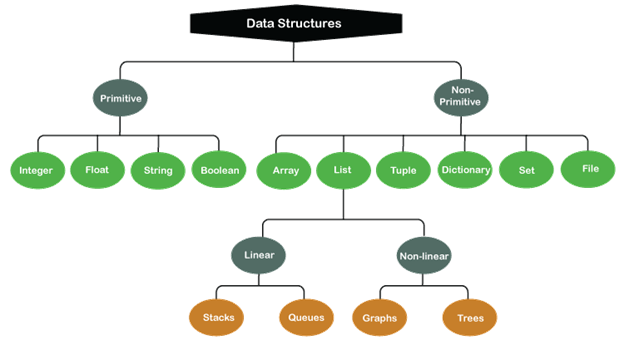

In [277]:
Image("../resources/datatypes.png")
# Source: https://www.tutorialandexample.com/python-data-structures

# Printing and strings

While less common in scientific computing settings (outside of bioinformatics), Python includes a native`str` datatype for text, which has its own set of rules and interactions.

In [ ]:
# A print statement
print("Hello world")

print("Hello", "world")

msg = "Hello"
msg += " world"
print(msg)

msg = " ".join(["Hello", "world"])
print(msg)

a = 7
print(f"Hello World o{a}")


Hello world
Hello world
Hello world
Hello world
Hello World o7


By default, Python caches outputs generated using the `print()` function, and it waits to dump them into standard output in order to save on memory and runtime overhead. However, sometimes a long computation benefits from routinely being forced to report on its status to standard output. This can be done by passing the `flush=True` option to the `print()` function.


In [12]:
import time

print("Begin long computation without flushing")
for i in range(100):
    time.sleep(0.05)
    if i == 0:
        print("40 iterations complete")

print("Begin long computation with flushing")
for i in range(100):
    time.sleep(0.05)
    if i == 4:
        print("40 iterations complete", flush=True)


Begin long computation without flushing
40 iterations complete
Begin long computation with flushing
40 iterations complete
